# <b><span style='color:#F1A424'>AutoML - Multi-Class Classification - Iris Flower Type Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    


The Iris dataset is a classic dataset in the field of machine learning and statistics.It contains measurements of various features of iris flowers, making it a quintessential dataset for practicing classification algorithms and statistical analysis.

Here are some key details about the Iris dataset:

**Features**:

- `Sepal Length (cm)`: Measurement of the length of the outermost petal parts (sepals).
- `Sepal Width (cm)`: Measurement of the width of the sepals.
- `Petal Length (cm)`: Measurement of the length of the innermost petal parts (petals).
- `Petal Width (cm)`: Measurement of the width of the petals.

**Target Variable**:

- `Species`: The species of iris flowers. It includes three classes: `Setosa`, `Versicolor` and `Virginica`.

        
**Objective**:

The primary objective is typically to build a model that can accurately classify iris flowers into one of the three species based on the provided features.

**Challenges**:

- The dataset consists of 150 instances, with 50 instances for each of the three classes.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data("teradataml", "iris_input")

In [5]:
# Fetching in teradata dataframe
iris = DataFrame.from_table("iris_input")

In [6]:
# first 5 rows
iris.head()

id,sepal_length,sepal_width,petal_length,petal_width,species
3,4.7,3.2,1.3,0.2,1
5,5.0,3.6,1.4,0.2,1
6,5.4,3.9,1.7,0.4,1
7,4.6,3.4,1.4,0.3,1
9,4.4,2.9,1.4,0.2,1
10,4.9,3.1,1.5,0.1,1
8,5.0,3.4,1.5,0.2,1
4,4.6,3.1,1.5,0.2,1
2,4.9,3.0,1.4,0.2,1
1,5.1,3.5,1.4,0.2,1


In [7]:
# iris dataset
iris.shape

(150, 6)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
iris_sample = iris.sample(frac = [0.8, 0.2])

In [9]:
iris_sample.head()

id,sepal_length,sepal_width,petal_length,petal_width,species,sampleid
3,4.7,3.2,1.3,0.2,1,1
5,5.0,3.6,1.4,0.2,1,2
6,5.4,3.9,1.7,0.4,1,1
7,4.6,3.4,1.4,0.3,1,1
9,4.4,2.9,1.4,0.2,1,2
10,4.9,3.1,1.5,0.1,1,1
8,5.0,3.4,1.5,0.2,1,1
4,4.6,3.1,1.5,0.2,1,1
2,4.9,3.0,1.4,0.2,1,2
1,5.1,3.5,1.4,0.2,1,1


In [10]:
# Fetching train and test data
iris_train= iris_sample[iris_sample['sampleid'] == 1].drop('sampleid', axis=1)
iris_test = iris_sample[iris_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
iris_train.shape

(120, 6)

In [12]:
# test data shape
iris_test.shape

(30, 6)

In [13]:
#train dataset
iris_train.head()

id,sepal_length,sepal_width,petal_length,petal_width,species
4,4.6,3.1,1.5,0.2,1
7,4.6,3.4,1.4,0.3,1
8,5.0,3.4,1.5,0.2,1
10,4.9,3.1,1.5,0.1,1
13,4.8,3.0,1.4,0.1,1
14,4.3,3.0,1.1,0.1,1
11,5.4,3.7,1.5,0.2,1
6,5.4,3.9,1.7,0.4,1
3,4.7,3.2,1.3,0.2,1
1,5.1,3.5,1.4,0.2,1


In [14]:
# test dataset
iris_test.head()

id,sepal_length,sepal_width,petal_length,petal_width,species
9,4.4,2.9,1.4,0.2,1
22,5.1,3.7,1.5,0.4,1
23,4.6,3.6,1.0,0.2,1
25,4.8,3.4,1.9,0.2,1
35,4.9,3.1,1.5,0.2,1
38,4.9,3.6,1.4,0.1,1
30,4.7,3.2,1.6,0.2,1
12,4.8,3.4,1.6,0.2,1
5,5.0,3.6,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoClassifier instance
# Using only 'xgboost' and 'knn' for model training
# Keeping early stopping timer threshold to 300 sec and max_models 5
# and verbose level 2 for detailed loggging

aml = AutoClassifier(include=['xgboost', 'knn'],
                     verbose=2,
                     max_runtime_secs=300,
                     max_models=5)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 120
Total Columns in the data: 6

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
sepal_length,FLOAT,120,0,None,0,120,0,0.0,100.0
species,INTEGER,120,0,None,0,120,0,0.0,100.0
petal_length,FLOAT,120,0,None,0,120,0,0.0,100.0
sepal_width,FLOAT,120,0,None,0,120,0,0.0,100.0
petal_width,FLOAT,120,0,None,0,120,0,0.0,100.0
id,INTEGER,120,0,None,0,120,0,0.0,100.0



Statistics of Data:


func,id,sepal_length,sepal_width,petal_length,petal_width,species
min,1,4.3,2.2,1.1,0.1,1
std,43.129,0.82,0.425,1.765,0.765,0.82
25%,40.75,5.2,2.8,1.6,0.3,1
50%,76.5,5.8,3,4.4,1.35,2
75%,114.25,6.5,3.3,5.1,1.825,3
max,149,7.7,4.4,6.9,2.5,3
mean,76.35,5.895,3.075,3.817,1.236,2.017
count,120,120,120,120,120,120



Target Column Distribution:


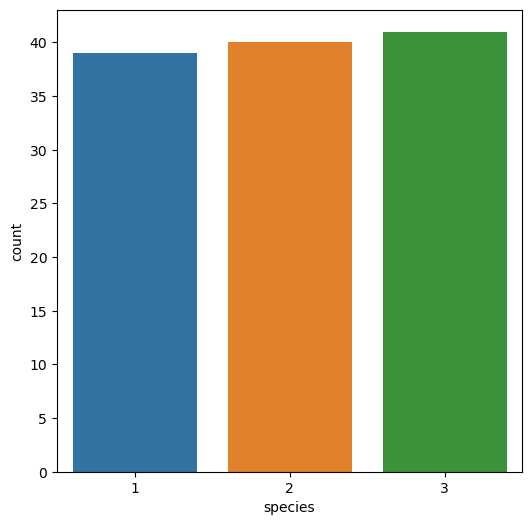

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
    ColumnName  OutlierPercentage
0  sepal_width                2.5


Analysis completed. No action taken.                                                    


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


Analysis completed. No categorical columns were found.                                   


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


sepal_length,sepal_width,petal_length,petal_width,species,id
5.1,3.4,1.5,0.2,1,10
6.3,3.3,6.0,2.5,3,9
5.4,3.9,1.3,0.4,1,17
7.7,3.8,6.7,2.2,3,12
5.6,2.8,4.9,2.0,3,11
5.7,3.8,1.7,0.3,1,19
6.7,3.1,5.6,2.4,3,14
5.0,3.2,1.2,0.2,1,22
5.6,2.7,4.2,1.3,2,13
6.4,2.7,5.3,1.9,3,21


sepal_length,sepal_width,petal_length,petal_width,species,id
6.3,3.3,4.7,1.6,2,26
6.6,2.9,4.6,1.3,2,27
6.9,3.1,5.4,2.1,3,91
5.2,3.5,1.5,0.2,1,30
5.8,4.0,1.2,0.2,1,31
6.7,3.3,5.7,2.1,3,95
6.1,2.6,5.6,1.4,3,28
6.4,2.9,4.3,1.3,2,68
6.3,2.5,5.0,1.9,3,102
4.9,2.5,4.5,1.7,3,106


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
    ColumnName  OutlierPercentage
0  sepal_width                2.5


['sepal_width']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719256655544986"' - 7/16


sepal_length,sepal_width,petal_length,petal_width,species,id
6.7,3.3,5.7,2.5,3,144
7.4,2.8,6.1,1.9,3,16
6.2,2.8,4.8,1.8,3,50
7.2,3.2,6.0,1.8,3,136
7.3,2.9,6.3,1.8,3,63
7.0,3.2,4.7,1.4,2,55
6.1,2.8,4.0,1.3,2,44
6.1,2.8,4.7,1.2,2,43
5.4,3.4,1.5,0.4,1,39
5.4,3.7,1.5,0.2,1,41


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719256731290005"' - 8/16
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719256443657978"'


['petal_width', 'sepal_width', 'sepal_length', 'petal_length']


['petal_width', 'sepal_width', 'sepal_length', 'petal_length']


species,id,petal_width,sepal_width,sepal_length,petal_length
1,10,0.04166666666666667,0.7058823529411764,0.23529411764705874,0.06896551724137928
3,12,0.8750000000000001,0.9411764705882353,1.0,0.9655172413793102
2,13,0.5,0.2941176470588236,0.3823529411764705,0.5344827586206896
3,14,0.9583333333333333,0.5294117647058824,0.7058823529411765,0.7758620689655171
3,16,0.75,0.3529411764705881,0.911764705882353,0.8620689655172413
1,17,0.12500000000000003,1.0,0.323529411764706,0.03448275862068964
2,15,0.6666666666666666,0.47058823529411764,0.7058823529411765,0.6724137931034482
3,11,0.7916666666666666,0.3529411764705881,0.3823529411764705,0.6551724137931034
3,9,1.0,0.6470588235294117,0.588235294117647,0.8448275862068965
2,8,0.5416666666666666,0.47058823529411764,0.676470588235294,0.5689655172413793


species,id,petal_width,sepal_width,sepal_length,petal_length
1,85,0.12500000000000003,1.0,0.323529411764706,0.10344827586206894
1,31,0.04166666666666667,1.0588235294117647,0.4411764705882352,0.017241379310344803
3,95,0.8333333333333334,0.6470588235294117,0.7058823529411765,0.7931034482758619
1,127,0.12500000000000003,1.2941176470588238,0.411764705882353,0.06896551724137928
1,134,0.08333333333333333,0.058823529411764504,0.058823529411764754,0.03448275862068964
3,91,0.8333333333333334,0.5294117647058824,0.7647058823529412,0.7413793103448276
3,106,0.6666666666666666,0.17647058823529405,0.17647058823529427,0.5862068965517241
3,29,0.8333333333333334,0.3529411764705881,0.6176470588235295,0.7758620689655171
3,102,0.75,0.17647058823529405,0.588235294117647,0.6724137931034482
1,116,0.08333333333333333,0.47058823529411764,0.14705882352941174,0.05172413793103445


['petal_length', 'petal_width']


['r_petal_length', 'r_petal_width']


species,id,r_petal_length,r_petal_width
1,10,0.06896551724137928,0.04166666666666667
3,12,0.9655172413793102,0.8750000000000001
2,13,0.5344827586206896,0.5
3,14,0.7758620689655171,0.9583333333333333
3,16,0.8620689655172413,0.75
1,17,0.03448275862068964,0.12500000000000003
2,15,0.6724137931034482,0.6666666666666666
3,11,0.6551724137931034,0.7916666666666666
3,9,0.8448275862068965,1.0
2,8,0.5689655172413793,0.5416666666666666


species,id,r_petal_length,r_petal_width
1,85,0.10344827586206894,0.12500000000000003
1,31,0.017241379310344803,0.04166666666666667
3,95,0.7931034482758619,0.8333333333333334
1,127,0.06896551724137928,0.12500000000000003
1,134,0.03448275862068964,0.08333333333333333
3,91,0.7413793103448276,0.8333333333333334
3,106,0.5862068965517241,0.6666666666666666
3,29,0.7758620689655171,0.8333333333333334
3,102,0.6724137931034482,0.75
1,116,0.05172413793103445,0.08333333333333333


['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


species,id,sepal_length,sepal_width,petal_length,petal_width
3,16,0.911764705882353,0.3529411764705881,0.8620689655172413,0.75
3,63,0.8823529411764705,0.41176470588235287,0.8965517241379308,0.7083333333333334
2,55,0.7941176470588235,0.5882352941176472,0.6206896551724137,0.5416666666666666
3,136,0.8529411764705882,0.5882352941176472,0.8448275862068965,0.7083333333333334
3,144,0.7058823529411765,0.6470588235294117,0.7931034482758619,1.0
2,15,0.7058823529411765,0.47058823529411764,0.6724137931034482,0.6666666666666666
2,77,0.588235294117647,0.058823529411764504,0.5689655172413793,0.5
3,35,0.588235294117647,0.7058823529411764,0.7758620689655171,0.9583333333333333
2,44,0.5294117647058822,0.3529411764705881,0.49999999999999994,0.5
2,43,0.5294117647058822,0.3529411764705881,0.6206896551724137,0.4583333333333333


species,id,sepal_length,sepal_width,petal_length,petal_width
1,31,0.4411764705882352,1.0588235294117647,0.017241379310344803,0.04166666666666667
3,28,0.5294117647058822,0.23529411764705882,0.7758620689655171,0.5416666666666666
2,68,0.6176470588235295,0.41176470588235287,0.5517241379310344,0.5
3,29,0.6176470588235295,0.3529411764705881,0.7758620689655171,0.8333333333333334
1,30,0.26470588235294124,0.7647058823529412,0.06896551724137928,0.04166666666666667
3,102,0.588235294117647,0.17647058823529405,0.6724137931034482,0.75
2,26,0.588235294117647,0.6470588235294117,0.6206896551724137,0.625
3,106,0.17647058823529427,0.17647058823529405,0.5862068965517241,0.6666666666666666
1,85,0.323529411764706,1.0,0.10344827586206894,0.12500000000000003
3,95,0.7058823529411765,0.6470588235294117,0.7931034482758619,0.8333333333333334


['col_0', 'col_1']


response_column : species                                                                                                                             
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.2)
max_depth : (5, 6, 7, 8)
min_node_size : (1, 2)
iter_num : (10, 20)
seed : 42
Total number of models for xgboost : 768
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : species
name : knn
model_type : Classification
k : (3, 5, 6, 8, 10, 12)
id_column : id
voting_weight : 1.0
Total number of models for knn : 6
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719257204283580"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719257527563268"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719256272504602"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719256744261110"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261968984666"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719257286309061"'


,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,XGBOOST_2,pca,0.916667,0.916667,0.916667,0.916667,0.933333,0.925926,0.921296,0.933333,0.916667,0.916088
1,2,KNN_1,rfe,0.916667,0.916667,0.916667,0.916667,0.933333,0.925926,0.921296,0.933333,0.916667,0.916088


In [16]:
# Fitting train data
aml.fit(iris_train, iris_train.species)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,XGBOOST_2,pca,0.916667,0.916667,0.916667,0.916667,0.933333,0.925926,0.921296,0.933333,0.916667,0.916088
1,2,KNN_1,rfe,0.916667,0.916667,0.916667,0.916667,0.933333,0.925926,0.921296,0.933333,0.916667,0.916088


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,XGBOOST_2,pca,0.916667,0.916667,0.916667,0.916667,0.933333,0.925926,0.921296,0.933333,0.916667,0.916088


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [21]:
# Generating prediction and metrics on test data
prediction = aml.predict(iris_test)

Data Transformation started ...


sepal_length,sepal_width,petal_length,petal_width,species
5.8,2.6,4.0,1.2,2
5.0,2.0,3.5,1.0,2
6.4,3.2,5.3,2.3,3
5.7,2.6,3.5,1.0,2
5.1,2.5,3.0,1.1,2
5.3,3.7,1.5,0.2,1
4.7,3.2,1.6,0.2,1
5.6,2.5,3.9,1.1,2
6.0,3.0,4.8,1.8,3
6.3,2.9,5.6,1.8,3


sepal_width,petal_length,id,petal_width,sepal_length,species
3.2,1.6,11,0.2,4.7,1
2.0,3.5,14,1.0,5.0,2
3.2,5.3,22,2.3,6.4,3
2.6,4.0,8,1.2,5.8,2
3.0,4.8,15,1.8,6.0,3
2.9,5.6,23,1.8,6.3,3
2.6,3.5,12,1.0,5.7,2
3.6,1.4,20,0.1,4.9,1
2.5,3.0,13,1.1,5.1,2
3.7,1.5,21,0.2,5.3,1


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719257344016789"'⫾⫾⫾｜ 60% - 6/10


id,petal_width,sepal_width,sepal_length,petal_length,species
16,0.2,3.6,5.0,1.4,1
21,0.2,3.7,5.3,1.5,1
32,0.2,3.0,4.9,1.4,1
18,0.4,3.7,5.1,1.5,1
39,0.2,3.6,4.6,1.0,1
24,0.2,3.4,4.8,1.9,1
30,1.5,2.8,6.3,5.1,3
36,1.8,2.5,6.7,5.8,3
10,1.8,3.0,5.9,5.1,3
15,1.8,3.0,6.0,4.8,3


species,id,petal_width,sepal_width,sepal_length,petal_length
1,16,0.04166666666666667,0.823529411764706,0.2058823529411765,0.05172413793103445
1,21,0.04166666666666667,0.8823529411764707,0.2941176470588235,0.06896551724137928
1,32,0.04166666666666667,0.47058823529411764,0.17647058823529427,0.05172413793103445
1,18,0.12500000000000003,0.8823529411764707,0.23529411764705874,0.06896551724137928
1,39,0.04166666666666667,0.823529411764706,0.088235294117647,-0.01724137931034484
1,24,0.04166666666666667,0.7058823529411764,0.14705882352941174,0.13793103448275856
3,30,0.5833333333333334,0.3529411764705881,0.588235294117647,0.6896551724137929
3,36,0.7083333333333334,0.17647058823529405,0.7058823529411765,0.8103448275862066
3,10,0.7083333333333334,0.47058823529411764,0.47058823529411775,0.6896551724137929
3,15,0.7083333333333334,0.47058823529411764,0.5,0.6379310344827585


id,petal_length,petal_width,species
16,1.4,0.2,1
21,1.5,0.2,1
32,1.4,0.2,1
18,1.5,0.4,1
39,1.0,0.2,1
24,1.9,0.2,1
30,5.1,1.5,3
36,5.8,1.8,3
10,5.1,1.8,3
15,4.8,1.8,3


species,id,r_petal_length,r_petal_width
1,16,0.05172413793103445,0.04166666666666667
1,21,0.06896551724137928,0.04166666666666667
1,32,0.05172413793103445,0.04166666666666667
1,18,0.06896551724137928,0.12500000000000003
1,39,-0.01724137931034484,0.04166666666666667
1,24,0.13793103448275856,0.04166666666666667
3,30,0.6896551724137929,0.5833333333333334
3,36,0.8103448275862066,0.7083333333333334
3,10,0.6896551724137929,0.7083333333333334
3,15,0.6379310344827585,0.7083333333333334


species,id,sepal_length,sepal_width,petal_length,petal_width
1,16,0.2058823529411765,0.823529411764706,0.05172413793103445,0.04166666666666667
1,21,0.2941176470588235,0.8823529411764707,0.06896551724137928,0.04166666666666667
1,32,0.17647058823529427,0.47058823529411764,0.05172413793103445,0.04166666666666667
1,18,0.23529411764705874,0.8823529411764707,0.06896551724137928,0.12500000000000003
1,39,0.088235294117647,0.823529411764706,-0.01724137931034484,0.04166666666666667
1,24,0.14705882352941174,0.7058823529411764,0.13793103448275856,0.04166666666666667
3,30,0.588235294117647,0.3529411764705881,0.6896551724137929,0.5833333333333334
3,36,0.7058823529411765,0.17647058823529405,0.8103448275862066,0.7083333333333334
3,10,0.47058823529411775,0.47058823529411764,0.6896551724137929,0.7083333333333334
3,15,0.5,0.47058823529411764,0.6379310344827585,0.7083333333333334


,id,col_0,col_1,species
0,20,-0.750418,0.186651,1
1,30,0.273375,-0.107115,3
2,26,-0.661736,-0.088051,1
3,36,0.509870,-0.230679,3
4,16,-0.710946,0.198741,1
5,10,0.276927,-0.029712,3
6,11,-0.688546,-0.053180,1
7,15,0.258919,-0.018103,3
8,21,-0.670612,0.283177,1
9,31,0.650362,0.607654,3


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being used for generating prediction :
Model ID : XGBOOST_2 
Feature Selection Method : pca

Prediction : 
   id  Prediction  Confidence_Lower  Confidence_upper  species
0  26           1               1.0               1.0        1
1  16           1               1.0               1.0        1
2  10           2               1.0               1.0        3
3  11           1               1.0               1.0        1
4  21           1               1.0               1.0        1
5  31           3               1.0               1.0        3
6  15           2               1.0               1.0        3
7  36           3               1.0               1.0        3
8  30           2               1.0               1.0        3
9  20           1               1.0               1.0        1

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  Pre

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  3,  6]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,species
10,2,1.0,1.0,3
12,2,1.0,1.0,2
13,2,1.0,1.0,2
14,2,1.0,1.0,2
16,1,1.0,1.0,1
17,2,1.0,1.0,2
15,2,1.0,1.0,3
11,1,1.0,1.0,1
9,1,1.0,1.0,1
8,2,1.0,1.0,2


In [24]:
# Generating prediction and metrics on test data
prediction = aml.predict(iris_test, rank=2)

Data Transformation started ...


sepal_length,sepal_width,petal_length,petal_width,species
5.8,2.6,4.0,1.2,2
4.4,2.9,1.4,0.2,1
5.8,2.7,4.1,1.0,2
5.1,2.5,3.0,1.1,2
5.9,3.0,5.1,1.8,3
5.1,3.7,1.5,0.4,1
4.7,3.2,1.6,0.2,1
5.6,2.5,3.9,1.1,2
6.0,3.0,4.8,1.8,3
6.3,2.9,5.6,1.8,3


sepal_width,petal_length,id,petal_width,sepal_length,species
2.9,1.4,9,0.2,4.4,1
3.2,1.6,11,0.2,4.7,1
2.5,3.9,19,1.1,5.6,2
3.0,5.1,10,1.8,5.9,3
2.5,3.0,13,1.1,5.1,2
3.7,1.5,21,0.2,5.3,1
3.0,4.8,15,1.8,6.0,3
2.9,5.6,23,1.8,6.3,3
2.6,3.5,12,1.0,5.7,2
3.6,1.4,20,0.1,4.9,1


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261366915021"'⫾⫾⫾｜ 60% - 6/10


id,petal_width,sepal_width,sepal_length,petal_length,species
11,0.2,3.2,4.7,1.6,1
9,0.2,2.9,4.4,1.4,1
39,0.2,3.6,4.6,1.0,1
20,0.1,3.6,4.9,1.4,1
28,0.2,3.4,4.8,1.6,1
21,0.2,3.7,5.3,1.5,1
30,1.5,2.8,6.3,5.1,3
27,2.3,3.2,6.8,5.9,3
36,1.8,2.5,6.7,5.8,3
15,1.8,3.0,6.0,4.8,3


species,id,petal_width,sepal_width,sepal_length,petal_length
1,11,0.04166666666666667,0.5882352941176472,0.11764705882352951,0.08620689655172413
1,9,0.04166666666666667,0.41176470588235287,0.029411764705882505,0.05172413793103445
1,39,0.04166666666666667,0.823529411764706,0.088235294117647,-0.01724137931034484
1,20,0.0,0.823529411764706,0.17647058823529427,0.05172413793103445
1,28,0.04166666666666667,0.7058823529411764,0.14705882352941174,0.08620689655172413
1,21,0.04166666666666667,0.8823529411764707,0.2941176470588235,0.06896551724137928
3,30,0.5833333333333334,0.3529411764705881,0.588235294117647,0.6896551724137929
3,27,0.9166666666666666,0.5882352941176472,0.7352941176470588,0.8275862068965517
3,36,0.7083333333333334,0.17647058823529405,0.7058823529411765,0.8103448275862066
3,15,0.7083333333333334,0.47058823529411764,0.5,0.6379310344827585


id,petal_length,petal_width,species
11,1.6,0.2,1
9,1.4,0.2,1
39,1.0,0.2,1
20,1.4,0.1,1
28,1.6,0.2,1
21,1.5,0.2,1
30,5.1,1.5,3
27,5.9,2.3,3
36,5.8,1.8,3
15,4.8,1.8,3


species,id,r_petal_length,r_petal_width
1,11,0.08620689655172413,0.04166666666666667
1,9,0.05172413793103445,0.04166666666666667
1,39,-0.01724137931034484,0.04166666666666667
1,20,0.05172413793103445,0.0
1,28,0.08620689655172413,0.04166666666666667
1,21,0.06896551724137928,0.04166666666666667
3,30,0.6896551724137929,0.5833333333333334
3,27,0.8275862068965517,0.9166666666666666
3,36,0.8103448275862066,0.7083333333333334
3,15,0.6379310344827585,0.7083333333333334


species,id,sepal_length,sepal_width,petal_length,petal_width
1,11,0.11764705882352951,0.5882352941176472,0.08620689655172413,0.04166666666666667
1,9,0.029411764705882505,0.41176470588235287,0.05172413793103445,0.04166666666666667
1,39,0.088235294117647,0.823529411764706,-0.01724137931034484,0.04166666666666667
1,20,0.17647058823529427,0.823529411764706,0.05172413793103445,0.0
1,28,0.14705882352941174,0.7058823529411764,0.08620689655172413,0.04166666666666667
1,21,0.2941176470588235,0.8823529411764707,0.06896551724137928,0.04166666666666667
3,30,0.588235294117647,0.3529411764705881,0.6896551724137929,0.5833333333333334
3,27,0.7352941176470588,0.5882352941176472,0.8275862068965517,0.9166666666666666
3,36,0.7058823529411765,0.17647058823529405,0.8103448275862066,0.7083333333333334
3,15,0.5,0.47058823529411764,0.6379310344827585,0.7083333333333334


,id,col_0,col_1,species
0,24,-0.664545,0.065563,1
1,30,0.273375,-0.107115,3
2,18,-0.645382,0.267705,1
3,27,0.590973,0.176391,3
4,11,-0.688546,-0.053180,1
5,36,0.509870,-0.230679,3
6,32,-0.661783,-0.142749,1
7,15,0.258919,-0.018103,3
8,9,-0.718495,-0.247576,1
9,31,0.650362,0.607654,3


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being used for generating prediction :
Model ID : KNN_1 
Feature Selection Method : rfe

Prediction : 
   id  prediction  species
0  14           2        2
1  12           2        2
2  29           2        2
3   9           1        1
4  10           3        3
5  15           3        3
6  28           1        1
7  31           3        3
8  22           3        3
9  27           3        3

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  Precision    Recall        F1  Support
SeqNum                                                                                       
0               1  CLASS_1       11        0        0   1.000000  1.000000  1.000000       11
2               3  CLASS_3        0        0        8   1.000000  0.888889  0.941176        9
1               2  CLASS_2        0       10        1   0.909091  1.000000  0.9523

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  8]], dtype=int64)

In [25]:
# Printing prediction
prediction.head()

id,prediction,species
10,3,3
12,2,2
13,2,2
14,2,2
16,1,1
17,2,2
15,3,3
11,1,1
9,1,1
8,2,2


In [33]:
remove_context()

True